In [10]:
#importing necessary packages and setting earlystopping to 100 epochs 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p
from keras.preprocessing.image import ImageDataGenerator

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
EPOCHS = 100

In [11]:
#augmenting pictures through rotation, flips and rescale 
#splitting dataset into train, test and validation subsets 

root_path = "animals/"

gen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=45,
    horizontal_flip=True,
    vertical_flip=True
)

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["cane","cavallo","elefante","farfalla","gallina","gatto","mucca","pecora","ragno","scoiattolo"],
    shuffle=True,
    batch_size=32,
    target_size=(60,60),
    subset="training"
)

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["cane","cavallo","elefante","farfalla","gallina","gatto","mucca","pecora","ragno","scoiattolo"],
    shuffle=True,
    batch_size=32,
    target_size=(60,60),
    subset="validation"
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [12]:
#checking classes in datasets
classes = os.listdir(root_path)
classes


['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

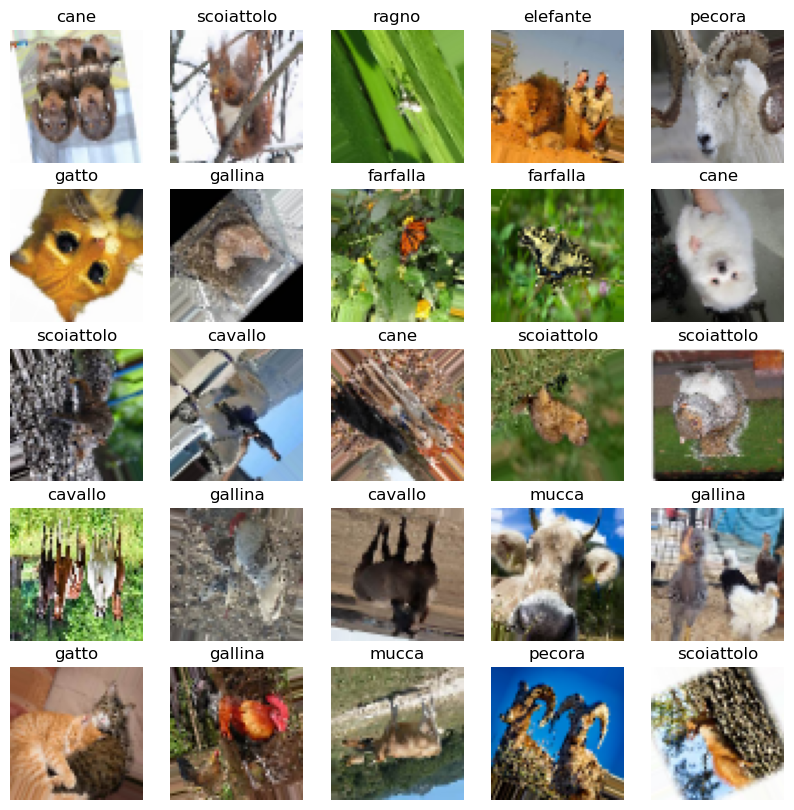

In [13]:
#printing pictures after preprocessing 

plt.figure(figsize=(10,10))
img, label = train_dataset.next()
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(classes[np.argmax(label[i,:])])


In [22]:
#building a model 

model = Sequential()
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', input_shape=(60, 60, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history_cn = model.fit(train_dataset, epochs=EPOCHS, validation_data=(validation_dataset), callbacks=[es])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_5 (Dense)             (None, 128)              

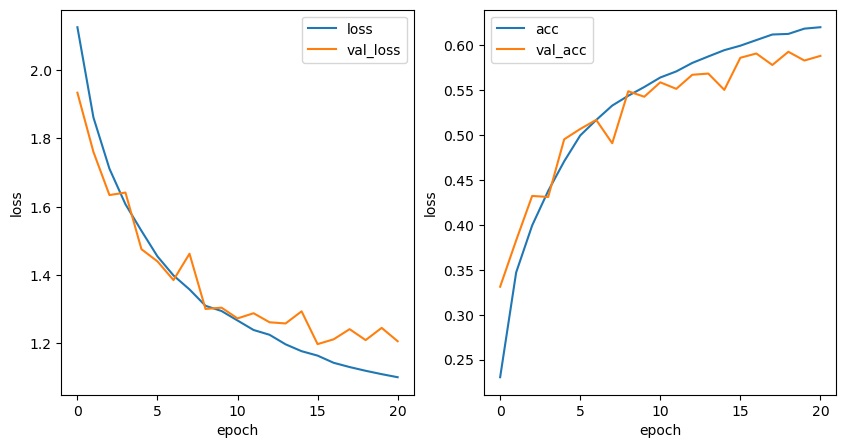

In [27]:
#plotting loss and accuracy of the model 

hist_cn = pd.DataFrame(history_cn.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_cn.loss, label = "loss")
plt.plot(hist_cn.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_cn.accuracy, label = "acc")
plt.plot(hist_cn.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [14]:
#using pretrained model to check its results 

vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG19(include_top=False,
                   input_shape=(60,60,3),
                   pooling='avg',classes=10,
                   weights='imagenet') 
for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)

vgg_model.add(Flatten())
vgg_model.add(Dense(10, activation='softmax'))
vgg_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 20,029,514
Trainable params: 5,130
Non-trainable params: 20,024,384
_________________________________________________________________


In [15]:
vgg_model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

history_cpt = vgg_model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS, callbacks = [es])

Epoch 1/100
655/655 [==============================] - 374s 569ms/step - loss: 1.9026 - accuracy: 0.3483 - val_loss: 1.7443 - val_accuracy: 0.4031
Epoch 2/100
655/655 [==============================] - 409s 624ms/step - loss: 1.7266 - accuracy: 0.4130 - val_loss: 1.6800 - val_accuracy: 0.4270
Epoch 3/100
655/655 [==============================] - 368s 562ms/step - loss: 1.6741 - accuracy: 0.4273 - val_loss: 1.6433 - val_accuracy: 0.4375
Epoch 4/100
655/655 [==============================] - 379s 578ms/step - loss: 1.6378 - accuracy: 0.4367 - val_loss: 1.6209 - val_accuracy: 0.4469
Epoch 5/100
655/655 [==============================] - 371s 567ms/step - loss: 1.6211 - accuracy: 0.4424 - val_loss: 1.5948 - val_accuracy: 0.4564
Epoch 6/100
655/655 [==============================] - 365s 558ms/step - loss: 1.6006 - accuracy: 0.4530 - val_loss: 1.5901 - val_accuracy: 0.4513
Epoch 7/100
655/655 [==============================] - 366s 558ms/step - loss: 1.6007 - accuracy: 0.4478 - val_loss: 1

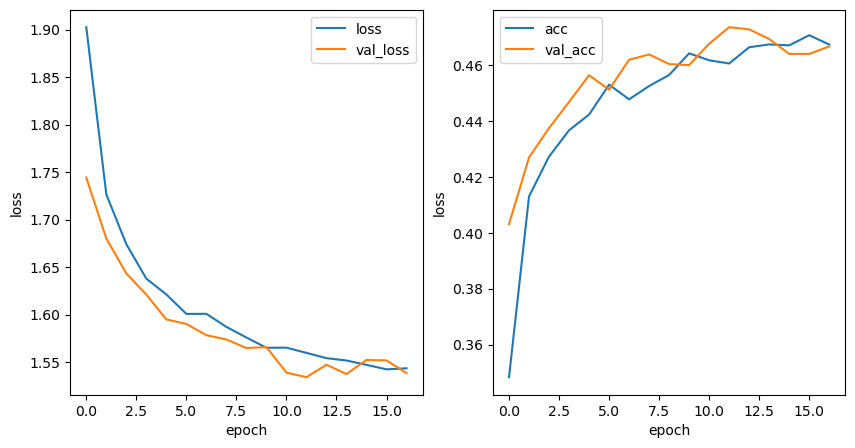

In [16]:
#plotting its loss and accuracy 

hist_cpt = pd.DataFrame(history_cpt.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist_cpt.loss, label = "loss")
plt.plot(hist_cpt.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_cpt.accuracy, label = "acc")
plt.plot(hist_cpt.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig('vgg_performance.png')